### Data Exploration

In [1]:
#general imports that we will need will almost always use - it is a good practice to import all libraries at the beginning of the notebook or script
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
import json

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE


# embedded methods
from sklearn.linear_model import LassoCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)

In [2]:
# Load the data paths
data_dir = "../data/"

# Load the raw data into a pandas dataframe

test = pd.read_csv(os.path.join(data_dir, "test.csv"))
train = pd.read_csv(os.path.join(data_dir, "train.csv"))
sample = pd.read_csv(os.path.join(data_dir, "sample_submission.csv"))

In [3]:
# Shapes (rows, columns)
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Sample submission shape:", sample.shape)

# Column names
print("\nTrain columns:", train.columns.tolist())
print("\nTest columns:", test.columns.tolist())

# First 5 rows (peek at data)
display(train.head())
display(test.head())
display(sample.head())

# Info (dtypes, non-null counts)
print("\nTrain info:")
print(train.info())
print("\nTest info:")
print(test.info())


Train shape: (75973, 14)
Test shape: (32567, 13)
Sample submission shape: (32567, 2)

Train columns: ['carID', 'Brand', 'model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'hasDamage']

Test columns: ['carID', 'Brand', 'model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'hasDamage']


,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


,carID,price
0,89856,851000
1,106581,514000
2,80886,323000
3,100174,921000
4,81376,620000



Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB
None

Test info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32567 entries, 0 to 32566
Dat

In [4]:
# Description of train
train.describe().T

,count,mean,std,min,25%,50%,75%,max
carID,75973.0,37986.000000,21931.660338,0.000000,18993.00,37986.0,56979.0,75972.000000
year,74482.0,2017.096611,2.208704,1970.000000,2016.00,2017.0,2019.0,2024.121759
price,75973.0,16881.889553,9736.926322,450.000000,10200.00,14699.0,20950.0,159999.000000
mileage,74510.0,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.000000
tax,68069.0,120.329078,65.521176,-91.121630,125.00,145.0,145.0,580.000000
mpg,68047.0,55.152666,16.497837,-43.421768,46.30,54.3,62.8,470.800000
engineSize,74457.0,1.660136,0.573462,-0.103493,1.20,1.6,2.0,6.600000
paintQuality%,74449.0,64.590667,21.021065,1.638913,47.00,65.0,82.0,125.594308
previousOwners,74423.0,1.994580,1.472981,-2.345650,1.00,2.0,3.0,6.258371
hasDamage,74425.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000


In [5]:
# Split the training data into features and target variable (price)
X = train.drop(columns=['price'])
y = train['price']

### We check for missing values and wrong values in the column Brand

In [6]:
# Look at the Missing values in x and y
missing_values_x = X.isnull().sum()
missing_values_y = y.isnull().sum()

print("\nMissing values in X:\n", missing_values_x[missing_values_x > 0])
print("\nMissing values in y:\n", missing_values_y[missing_values_y > 0])


Missing values in X:
 Brand             1521
model             1517
year              1491
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage         1548
dtype: int64

Missing values in y:
 []


In [7]:
# unique brands in the column brand
unique_brands = X['Brand'].unique()
print("\nUnique brands in 'Brand':\n", unique_brands)


Unique brands in 'Brand':
 ['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot']


### First we fix the brand names and afterwards we will map the brands from the model names

In [8]:
# Load the JSON mapping
with open("../mapping/brandname_mapping.json", "r", encoding="utf-8") as f:
    CANON = json.load(f)

In [9]:
import re

# Normalization function
def norm_brand(brand):
    if pd.isna(brand):
        return brand
    brand = brand.strip().lower()
    brand = re.sub(r'[.,-_]', ' ', brand)
    brand = ' '.join(brand.split())  # Remove extra spaces
    return brand

In [10]:
# Cleaning function using imported JSON
def clean_brand(col: pd.Series) -> pd.Series:
    nb = col.apply(norm_brand)
    mapped = nb.map(CANON)
    return mapped

In [11]:
# apply normalization and canonical mapping
X['Brand'] = X['Brand'].apply(norm_brand).map(CANON)

In [12]:
# unique brands in the column brand
unique_brands = X['Brand'].unique()
print("\nUnique brands in 'Brand':\n", unique_brands)


Unique brands in 'Brand':
 ['Volkswagen' 'Toyota' 'Audi' 'Ford' 'BMW' 'Škoda' 'Opel' 'Mercedes-Benz'
 'Hyundai' nan]


In [13]:
# Show the entries with missing values in brand
missing_brand_entries = X[X['Brand'].isnull()]
display(missing_brand_entries)

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
56,66591,NaN,T-Roc,2018.0,Semi-Auto,584.0,Petrol,150.0,41.5,2.0,79.0,1.0,0.0
75,5034,NaN,A3,2016.0,Manual,52519.0,Diesel,20.0,72.4,1.6,60.0,2.0,0.0
81,33153,NaN,I20,2020.0,MANUAL,3500.0,Petrol,145.0,47.9,1.0,41.0,2.0,0.0
176,45338,NaN,CL Class,2020.0,Semi-Auto,NaN,Petrol,145.0,33.2,2.0,61.0,4.0,0.0
191,66712,NaN,POLO,2016.0,Manual,32800.0,Petrol,20.0,60.1,1.0,54.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75632,72615,NaN,Golf,2015.0,Manual,79000.0,Diesel,20.0,67.3,2.0,68.0,0.0,0.0
75720,3436,NaN,Q5,2015.0,Semi-Auto,18188.0,Diesel,200.0,47.1,2.0,84.0,3.0,0.0
75810,7392,NaN,A5,2019.0,Automatic,10.0,Petrol,145.0,39.8,2.0,70.0,1.0,0.0
75828,13545,NaN,5 Series,2019.0,Semi-Auto,7609.0,Diese,145.0,65.7,2.0,67.0,3.0,0.0


- We fixed wrong names in the column Brand but we have missing values. We will try to fill them by looking at the column model.
But there are also some wrong values in the column model. We will try to fix them first


In [14]:
# Count the unique values of model in x
unique_models = X['model'].value_counts()
print("\nCounts of unique values in 'model' for entries with missing 'Brand':\n", unique_models)

# save the unique_models to a json file
unique_models.to_json("../mapping/unique_model_counts.json")


Counts of unique values in 'model' for entries with missing 'Brand':
 model
 Focus        6353
 C Class      4886
 Fiesta       4130
 Golf         3081
 Corsa        2182
              ... 
UP               1
 scal            1
 Fox             1
astra            1
 glb class       1
Name: count, Length: 735, dtype: int64


- Canonical Mapping and Normalization for model names

In [15]:
import re
import pandas as pd
import numpy as np
import json

def norm_model(x: object) -> str | float:
    """Lowercase, keep [a-z0-9+], strip spaces/hyphens/underscores."""
    if pd.isna(x):
        return np.nan
    s = str(x).lower()
    s = re.sub(r'[\s\-_]+', '', s)           # drop spaces, hyphens, underscores
    s = re.sub(r'[^a-z0-9\+]', '', s)        # keep letters, digits, plus
    return s or np.nan


In [16]:
# Load mapping JSON
with open("../mapping/modelname_mapping.json", "r", encoding="utf-8") as f:
    MM = json.load(f)

ALIASES = MM.get("aliases", {})
REGEX_RULES = MM.get("regex_rules", [])

In [17]:
def apply_regex_rules(norm_key: str) -> str:
    for rule in REGEX_RULES:
        pat = rule["pattern"]
        rep = rule["replace"]
        norm_key = re.sub(pat, rep, norm_key)
    return norm_key

In [18]:
def clean_model(series: pd.Series) -> pd.Series:
    normed = series.apply(norm_model)
    normed = normed.apply(lambda x: apply_regex_rules(x) if isinstance(x, str) else x)
    return normed.map(ALIASES)

In [19]:
# Apply the clean model function to the 'model' column
X['model'] = clean_model(X['model'])

# Apply the apply_regex_rules function to the 'model' column
X['model'] = X['model'].apply(lambda x: apply_regex_rules(x) if isinstance(x, str) else x)

# unique models in the column model
unique_models = X['model'].unique()
print("\nUnique models in 'model':\n", unique_models)
# print the number of unique models
print("\nNumber of unique models in 'model':", len(unique_models))


Unique models in 'model':
 ['Golf' 'Yaris' 'Q2' 'Fiesta' '2 Series' '3 Series' 'A3' 'Octavia'
 'Passat' 'Focus' 'Insignia' nan 'Q3' 'Fabia' 'A-Class' 'Ka+' 'GLC' 'i30'
 'C-Class' 'E-Class' 'Q5' 'Up' 'Mokka X' 'Corsa' 'Astra' 'TT' '5 Series'
 'Aygo' '4 Series' 'SLK' 'T-Roc' 'EcoSport' 'Tucson' 'X-Class' 'ix20'
 'i20' 'A1' 'Auris' 'Sharan' 'Adam' 'X3' 'A8' 'GLS' 'B-MAX' 'A4' 'Kona'
 'i10' 'Mokka' 'S-MAX' 'X2' 'Crossland X' 'Tiguan' 'A5' 'GLE' 'Zafira'
 'Ioniq' 'A6' 'Mondeo' 'Yeti Outdoor' 'X1' 'Scala' 'S-Class' '1 Series'
 'Kamiq' 'Kuga' 'Tourneo Connect' 'Q7' 'GLA' 'SL' 'Grandland X' 'i800'
 'RAV4' 'Touran' 'Citigo' 'Prius' 'Corolla' 'B-Class' 'Kodiaq' 'V-Class'
 'Caddy Maxi Life' 'Superb' 'Getz' 'Beetle' 'Galaxy' 'M3' 'GTC' 'X4' 'Ka'
 'ix35' 'Grand Tourneo Connect' 'M4' 'Tourneo Custom' 'Z4' 'X5' 'Meriva'
 'RS6' 'Verso' 'CLS' 'C-MAX' 'CLA' 'i40' 'Tiguan Allspace' '6 Series'
 'Caravelle' 'Karoq' 'i3' 'Grand C-MAX' 'T-Cross' 'A7' 'Agila' 'GT86'
 'Yeti' 'California' 'Land Cruiser' 'Edge'

In [20]:
# Count all the entries in the json to compare with the unique models in the column model
with open("../mapping/modelname_mapping.json", "r", encoding="utf-8") as f:
    MM = json.load(f)
ALIASES = MM.get("aliases", {})
print("\nNumber of entries in the modelname_mapping.json:", len(ALIASES))


Number of entries in the modelname_mapping.json: 195


- Now we have all the modelnames fixed and normalized. We can use this to fill the missing values in the column Brand.

In [21]:
# Check for missing values in 'Brand' before filling
print("\nMissing values in 'Brand' before filling:\n", X['Brand'].isnull().sum())

# Load mapping
with open("../mapping/brand_model_mapping.json", "r", encoding="utf-8") as f:
    brand_to_model = json.load(f)

# Map directly using the mapping
X["Brand"] = X["Brand"].fillna(X["model"].map(brand_to_model))

# Check for missing values in 'Brand' after filling
print("\nMissing values in 'Brand' after filling:\n", X['Brand'].isnull().sum())


Missing values in 'Brand' before filling:
 1539

Missing values in 'Brand' after filling:
 150


In [22]:
# Check for nan_brand values with models that could not be mapped
nan_brand_models = X[X['Brand'].isnull()]['model'].unique()
print("\nModels with missing 'Brand' after mapping:\n", nan_brand_models)


Models with missing 'Brand' after mapping:
 [nan]


- We have mapped every possible model to its brand. The remaining missing values in the column Brand are due to missing model names.
  

In [23]:
# Look at the Missing values in x and y
missing_values_x = X.isnull().sum()
missing_values_y = y.isnull().sum()

print("\nMissing values in X:\n", missing_values_x[missing_values_x > 0])



Missing values in X:
 Brand              150
model             6865
year              1491
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage         1548
dtype: int64


In [24]:
# Show the entries with missing values in model
missing_brand_entries = X[X['model'].isnull()]
display(missing_brand_entries)

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
11,46005,Mercedes-Benz,NaN,2020.0,Semi-Aut,1000.0,Diesel,145.000000,67.3,1.5,45.0,1.0,0.0
22,73943,Volkswagen,NaN,2016.0,Manual,29925.0,Petrol,20.000000,60.1,1.0,51.0,4.0,0.0
26,35263,Mercedes-Benz,NaN,NaN,Automatic,45000.0,Petrol,-56.193202,46.3,1.6,59.0,NaN,0.0
30,55065,Toyota,NaN,2017.0,Automatic,59000.0,Hybrid,0.000000,74.3,1.8,95.0,2.0,0.0
44,68423,Volkswagen,NaN,NaN,NaN,26941.0,Petrol,145.000000,60.1,1.2,97.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75924,52995,Toyota,NaN,2019.0,automatic,6015.0,Hybrid,135.000000,57.7,1.8,NaN,4.0,0.0
75927,69479,Volkswagen,NaN,2016.0,Manual,30000.0,Petrol,20.000000,60.1,1.0,63.0,NaN,0.0
75941,69092,Volkswagen,NaN,2019.0,Automatic,32.0,Petrol,150.000000,33.2,2.0,69.0,3.0,0.0
75944,66803,Volkswagen,NaN,2017.0,Manual,50899.0,Petrol,150.000000,60.1,1.2,65.0,3.0,0.0


- Here we should decide to delete the 150 Entries with missing Brand and Model. 
- But we will keep them for now and focus on the next column 'year'.

- We will fill the value of year with the median within brand/model.
- But first we have to fix the wrong values in the column year.

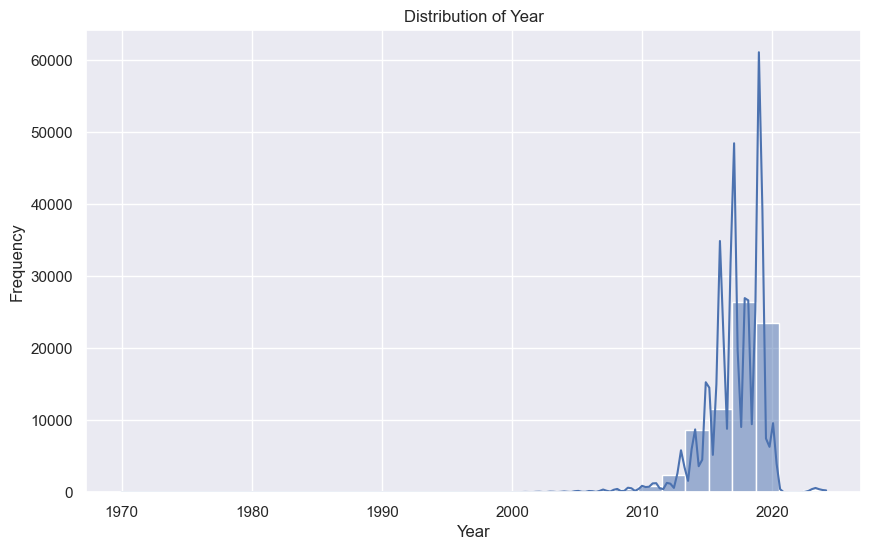

In [25]:
# Plot the distribution of the year column
plt.figure(figsize=(10, 6))
sns.histplot(X['year'].dropna(), bins=30, kde=True)
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

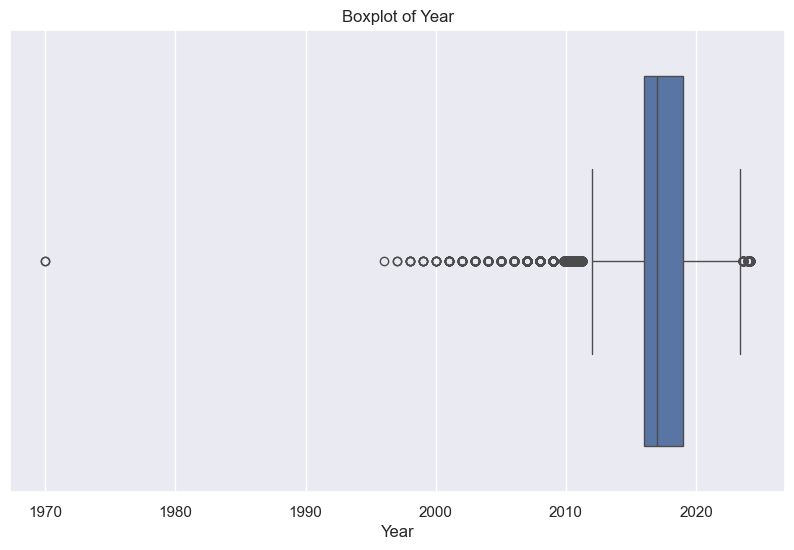

In [26]:
# Boxplot the year column to see the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=X['year'])
plt.title('Boxplot of Year')
plt.xlabel('Year')
plt.show()

In [28]:
# Show some entries after 2020 in a dataframe
future_years = X[X['year'] > 2020]
display(future_years)

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
35,53282,Toyota,Yaris,2023.367078,Manual,1225.0,Petrol,145.0,47.9,1.5,77.0,0.0,0.0
216,20770,Ford,Kuga,2023.116964,Manual,3376.0,Diesel,145.0,54.3,1.5,68.0,1.0,0.0
590,42947,Mercedes-Benz,GLE,2023.977311,Automatic,10516.0,Diesel,145.0,NaN,3.0,94.0,4.0,0.0
647,22446,Ford,Fiesta,2023.116964,manual,8015.0,Petrol,145.0,55.4,1.1,57.0,1.0,0.0
859,11832,BMW,Z4,2024.121759,Automatic,111.0,Petrol,145.0,38.7,2.0,32.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73935,22614,Ford,Kuga,2023.116964,MANUAL,32544.0,Diesel,145.0,54.3,2.0,65.0,2.0,0.0
74468,75005,Volkswagen,Touran,2023.389822,unknown,23746.0,Diesel,30.0,65.7,1.6,53.0,0.0,0.0
74591,44569,Mercedes-Benz,C-Class,2023.977311,Semi-Auto,20150.0,Petro,NaN,NaN,2.0,60.0,3.0,0.0
74900,57384,Opel,Mokka,2023.267989,Manual,56136.0,Diesel,30.0,62.8,1.7,57.0,4.0,0.0


- It should be possible to have cars after 2020 because the dataset is from 2020. So the only option is to delete them or to replace them with the median of the respective brand/model.

In [52]:
# Show cars with mileage less 100 and previous owners = 0 and sort by year
zero_mileage_cars = X[(X['mileage'] < 1000) & (X['previousOwners'] == 0) ]
zero_mileage_cars = zero_mileage_cars.sort_values(by='year', ascending=False)
display(zero_mileage_cars)

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
11735,37406,Mercedes-Benz,A-Class,2023.977311,manual,800.0,Petrol,145.0,28.5,1.3,85.0,0.0,0.0
21764,44982,Mercedes-Benz,C-Class,2023.977311,Automatic,796.0,Petrol,145.0,45.6,1.5,66.0,0.0,0.0
10143,5896,Audi,A5,2023.605276,Automatic,10.0,Petrol,145.0,39.8,2.0,80.0,0.0,0.0
68858,4134,Audi,A3,2023.605276,Semi-Auto,318.0,Petrol,150.0,33.2,2.0,33.0,0.0,0.0
61521,55491,Toyota,NaN,2023.367078,Automatic,219.0,Petrol,145.0,34.5,1.2,87.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42544,2834,Audi,Q7,NaN,automatic,100.0,Diesel,145.0,33.6,3.0,34.0,0.0,0.0
45271,32039,Hyundai,Tucson,NaN,Semi-Auto,10.0,Petrol,145.0,36.2,1.6,36.0,0.0,0.0
50449,61355,Opel,Corsa,NaN,Manual,100.0,Petro,145.0,43.5,1.4,63.0,0.0,0.0
63618,42340,Mercedes-Benz,E-Class,NaN,Semi-Auto,723.0,Diesel,145.0,57.7,2.0,74.0,0.0,0.0
